In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[: ,0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0., 10., size = 100)

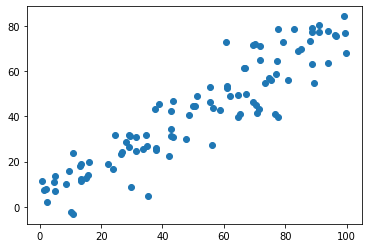

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean

In [4]:
# np.mean()还可以对矩阵在某一个方向上求平均值

广播的规则:

让所有输入数组都向其中形状最长的数组看齐，形状中不足的部分都通过在前面加 1 补齐。  
输出数组的形状是输入数组形状的各个维度上的最大值。  
如果输入数组的某个维度和输出数组的对应维度的长度相同或者其长度为 1 时，这个数组能够用来计算，否则出错。  
当输入数组的某个维度的长度为 1 时，沿着此维度运算时都用此维度上的第一组值。 


简单理解：对两个数组，分别比较他们的每一个维度（若其中一个数组没有当前维度则忽略），满足：  
数组拥有相同形状。  
当前维度的值相等。  
当前维度的值有一个是 1。  
若条件不满足，抛出 "ValueError: frames are not aligned" 异常。

In [5]:
def demean(X):
    #np.array的广播机制，矩阵-向量
    return X - np.mean(X,axis = 0)

In [6]:
X_demean = demean(X)

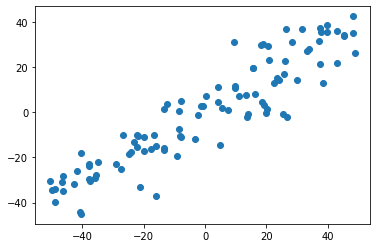

In [7]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [8]:
np.mean(X_demean[:, 0])

-3.563371819836902e-14

In [9]:
np.mean(X_demean[:, 1])

5.5067062021407766e-15

虽然都不是严格的0，但是较为接近了

### 梯度上升法

In [10]:
def f(w, x):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [11]:
def df_math(w, x):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [12]:
def df_debug(w, X, epsilon = 0.0001):
    # epsilon取的很小的原因是，w作为一个方向向量，每个分量的值都很小
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        #注意这里必须是J(theta + epsilon) - (theta - epsilon) / 2 * epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [13]:
def gradient_ascent_1(df, X, initial_w, eta, n_iters = 1e4, spsilon = 1e-8):
    
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w 
        w = w + eta * gradient_ascent
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

w作为方向向量，需要时刻保证模长为1，但是上面这个函数中，没有做到这一点，需要进一步改进

In [14]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w 
        w = w + eta * gradient
        w = direction(w)  # 注意1：每次求一个单位向量
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

对于参数的初始化这一步，需要注意的是，如果令w为全零向量，那么  
def df_math(w, x):  
    return X.T.dot(X.dot(w)) ** 2. / len(X)  
的结果会是0，然后根据w的迭代公式：  
w = w + eta * gradient_ascent  
新产生的w也会是0，所以w会一直在0处  
0是$Var(X_{project}) = \dfrac {1}{m} \sum^{m}_{i = 1}(X^{(i)}·w)^2 $的一个极小值点，这里的斜率为0。

In [15]:
initial_w = np.random.random(X.shape[1]) #注意2：w不能用0向量开始

In [16]:
eta = 0.001

注意3： 不能使用StandardScaler标准化数据，如果标注化了，其实就变成一个圆了，那特征差异最大的方向就变了，而且效果也不好了

In [17]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77638068, 0.63026426])

In [18]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

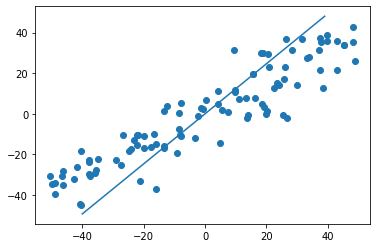

In [19]:
x = np.arange(-40, 40)
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot(x,w[0]/w[1] * x)
plt.show()